# PA005: High Value Customer Identification (Insiders)

## 0.0. Planejamento da Solução

### Input - Entrada

1. Problema de Negócio
    - Seecionar os clientes mais valiosos para integrar um programa de fidelização


2. Conjunto de Dados
    - Vendas de um e-commerce onine, durante o período de um ano

### Output - Saída

1. A indicação das pessoas que farão parte do programa de Insiders
    - Lista: client_id | is_insider
             102030    |   yes/1
             203040    |   no/2
             
2. Relatório com as respostas das perguntas de negócio

- Quem são as pessoas elegíveis para participar do programa de Insiders ?
- Quantos clientes farão parte do grupo?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
- Qual a expectativa de faturamento desse grupo para os próximos meses ?
- Quais as condições para uma pessoa ser elegível ao Insiders ?
- Quais as condições para uma pessoa ser removida do Insiders ?
- Qual a garantia que o programa Insiders é melhor que o restante da base ?
- Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Tasks - Tarefas

1. Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - O que é ser elegível? O que são clientes de maior valor?
    - Faturamento:
        - Alto ticket médio
        - Alto LTV
        - Baixa recência
        - Alto basket size
        - Baixa probabilidade de churn
        - Alta Previsão de LTV
        - Alta probabilidade de compra

    - Custo:
        - Baixa taxa de devolução
        
    - Experiência de compra:
        - Média alta das avaliações
        

2. Quantos clientes farão parte do grupo?
    - Número total de clientes 
        - Calcula a porcentagem do grupo insiders
        
        
3. Quais as principais características desses clientes ?
    - Escrever características do cliente:
        - Idade
        - Localização
        
    - Escrever caraterísitacas do consumo:
        - Atributos da Clusterização
        
        
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Faturamento total do ano
    - Faturameto do grupo Insiders
    
    
5. Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - LTV do grupo Insiders
    - Análise de Cohort
    
    
6. Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Definir a periodicidade
    - A pessoa precisa ser similar ou parecido com uma pessoa/grupo
    
    
7. Quais as condições para uma pessoa ser removida do Insiders ?
    - Definir a periodicidade
    - A pessoa precisa ser diferente com uma pessoa/grupo
    
    
8. Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Teste A/B
    - Teste A/B Bayesino
    - Teste de hipóteses
    
    
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
    - Desconto
    - Preferência de compra
    - Frete
    - Visita a empresa

# <font color = 'green'> 0.0. Imports </f>

In [203]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import HTML
from sklearn import cluster as c
from sklearn import metrics as m
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from plotly import express as px
import umap.umap_ as umap

## <font color = 'green'> 0.1. Helper Functions </f>

## <font color = 'green'> 0.2. Load Dataset </f>

In [204]:
# load data
df_raw = pd.read_csv('data/Ecommerce.csv',encoding='unicode_escape')

# Remove extra columns
df_raw = df_raw.drop(columns=['Unnamed: 8'],axis=1)

In [205]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# <font color = 'green'> 1.0. Data Description </f>

In [206]:
df1 = df_raw.copy()

## <font color = 'green'> 1.1. Rename Columns </f>

In [207]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
               'unit_price', 'customer_id', 'country']
df1.columns = cols_new

In [208]:
df1.sample()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
484246,577526,21975,PACK OF 60 DINOSAUR CAKE CASES,24,18-Nov-17,0.55,16513.0,United Kingdom


## <font color = 'green'> 1.2. Data dimensions </f>

In [209]:
print('Rows: {}'.format(df1.shape[0]))
print('Columns: {}'.format(df1.shape[1]))

Rows: 541909
Columns: 8


## <font color = 'green'> 1.3. Data Types </f>

In [210]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## <font color = 'green'> 1.4. Chack NA </f>

In [211]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## <font color = 'green'> 1.5. Replace NA </f>

In [212]:
# remover NA
df1 = df1.dropna( subset=['description','customer_id'])
print('Removed data: {:.2f}'.format(1 - (df1.shape[0]/df_raw.shape[0])))

Removed data: 0.25


In [213]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## <font color = 'green'> 1.6. Change dtypes </f>

In [214]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [215]:
# invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer_id
df1['customer_id'] = df1['customer_id'].astype('int64')
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [216]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## <font color = 'green'> 1.7. Descriptive Analysis </f>

# <font color = 'green'> 2.0. Feature Engineering </f>

In [217]:
df2 = df1.copy()

## <font color = 'b'> 2.1. Feature Creation </f>

In [218]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [219]:
df_ref = df2.drop(['invoice_no','stock_code','description',
          'quantity','invoice_date','unit_price',
          'country'],axis=1).drop_duplicates(ignore_index=True)

df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [220]:
# Gross Revenue (Faturamento) quantity * price
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref,df_monetary, how='left',on='customer_id')

# Recency - Last day purchase
df_recency = df2[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_ref = pd.merge(df_ref, df_recency[['customer_id','recency_days']], on ='customer_id', how='left')

# Frequency
df_freq = df2[['customer_id','invoice_no']].drop_duplicates('invoice_no').groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref, df_freq, on='customer_id',how='left')

# Avg Ticket
df_avg_ticket = df2[['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket,on='customer_id',how='left')

# <font color = 'green'> 3.0. Filtering Variables </f>

In [221]:
df3 = df_ref.copy()

# <font color = 'green'> 4.0. Exploratory Data Analysis </f>

In [222]:
df4 = df3.copy()

# <font color = 'green'> 5.0. Data Preparation </f>

In [223]:
df5 = df4.copy()

# <font color = 'green'> 6.0. Feature Selection </f>

In [224]:
df6 = df5.copy()

# <font color = 'green'> 7.0. Hyperparameter Fine Tuning </f>

In [225]:
X = df6.drop(columns=['customer_id'])

In [226]:
clusters = [2,3,4,5,6,7]

## <font color = 'b'> 7.1. Within-Cluster Sum of Square (WSS) </f>

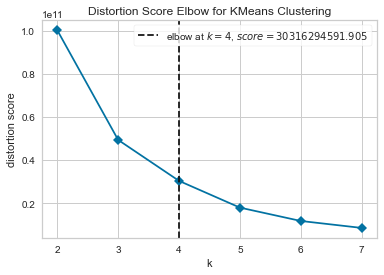

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [227]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, timings = False)
kmeans.fit( X )
kmeans.show()

## <font color = 'b'> 7.2. Silhouette Score (WSS) </f>

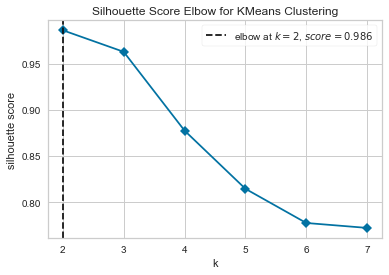

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [228]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters,metric = 'silhouette', timings = False)
kmeans.fit( X )
kmeans.show()

### <font color = 'b'> 7.2.1. Silhouette Analysis </f>

In [229]:
X.dtypes

gross_revenue    float64
recency_days       int64
invoice_no         int64
avg_ticket       float64
dtype: object

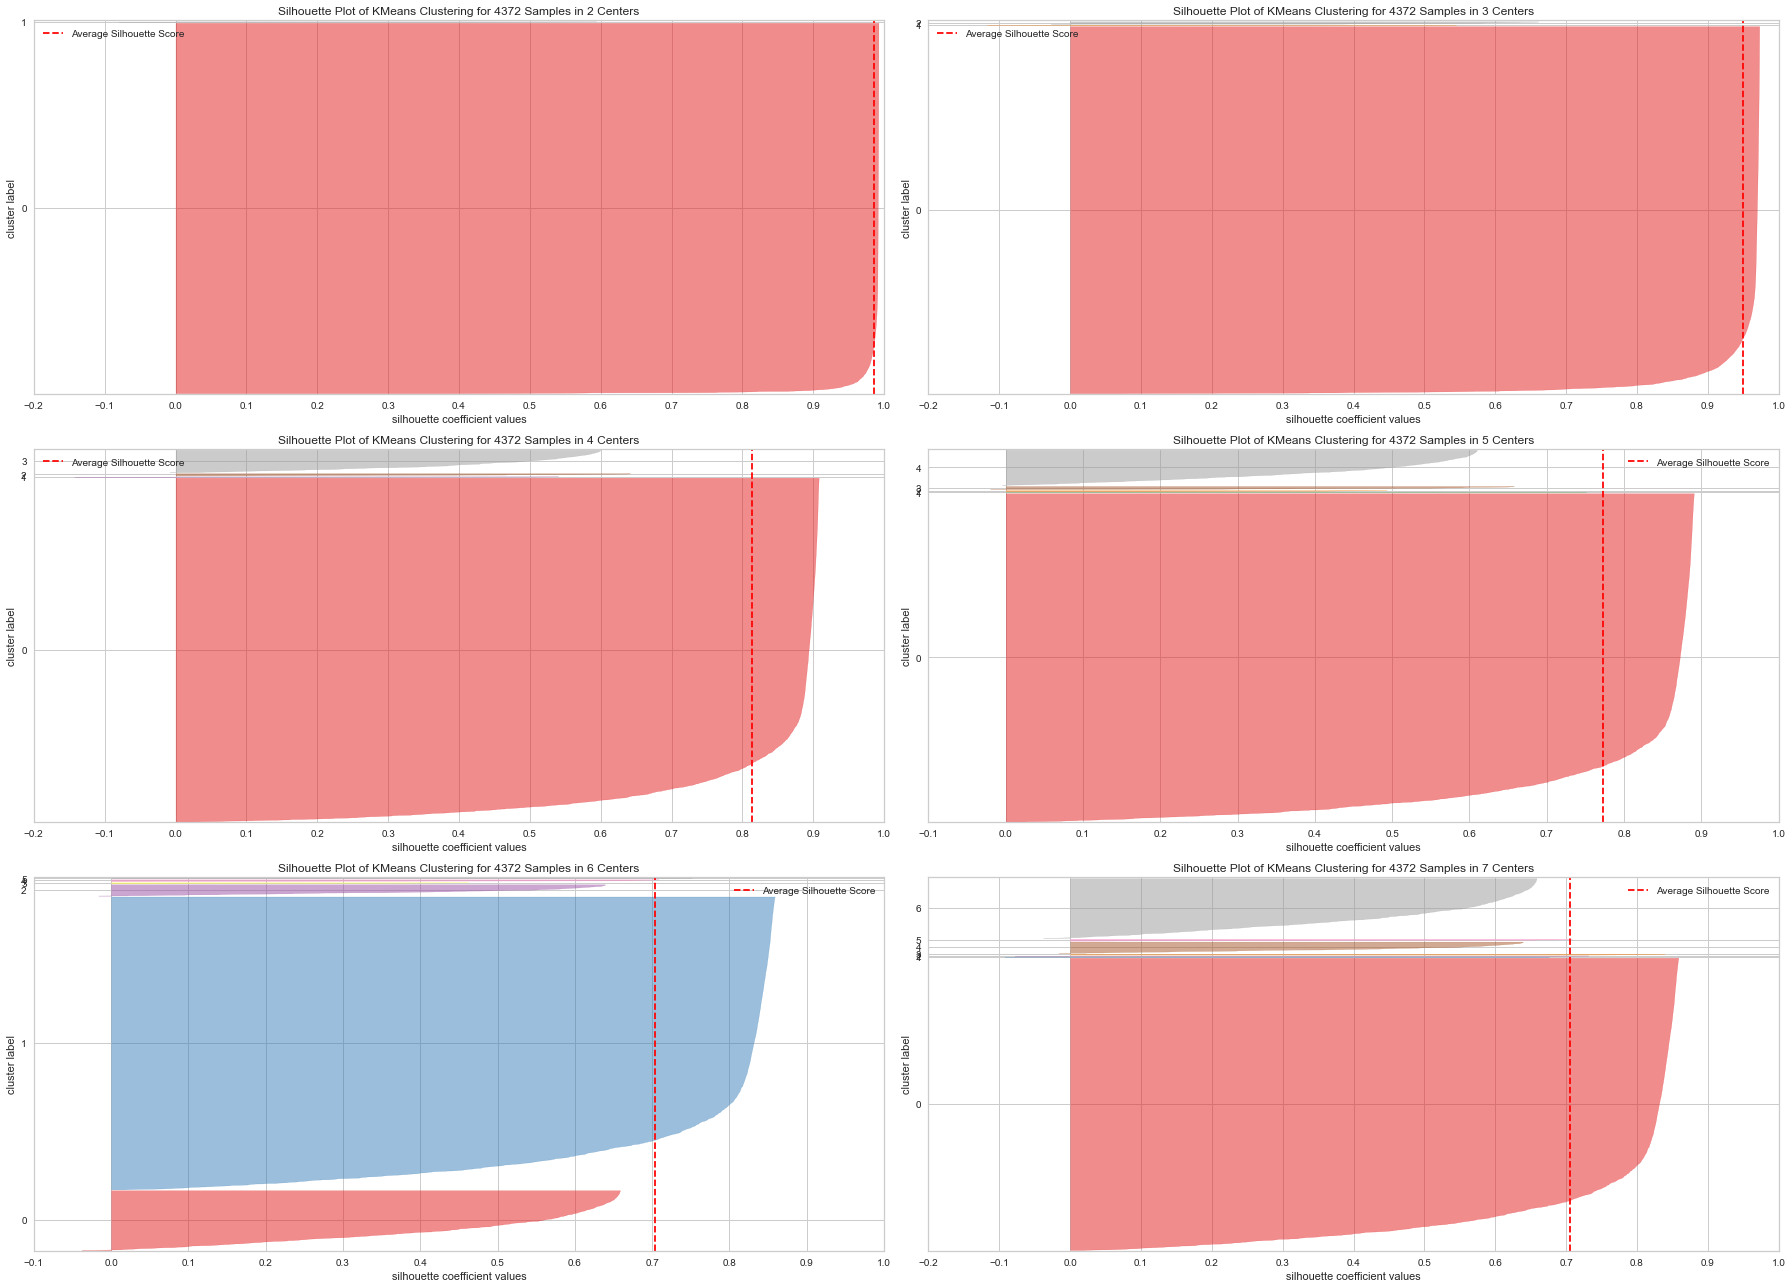

In [230]:
fig, ax = plt.subplots(3,2,figsize=(25,18))
for k in clusters:
    kn = c.KMeans(n_clusters = k, init = 'random', n_init=10, max_iter=100, random_state=42)
    
    q, mod = divmod(k,2)
    visualizer = SilhouetteVisualizer(kn, color='yellowbrick',ax=ax[q-1,mod])
    visualizer.fit(X)
    visualizer.finalize()
    plt.tight_layout()

# <font color = 'green'> 8.0. Training Model </f>

## <font color = 'b'> 8.1. K-Means </f>

In [231]:
# model definition
k = 4

# model training
kmeans = c.KMeans(init='random',n_clusters=k, n_init=10, max_iter=300, random_state=42)
kmeans.fit( X )

# clustering
labels = kmeans.labels_

## <font color = 'b'> 8.2. Cluster Validation </f>

In [232]:
## WSS (Within Clusters Sum of Square)
print('WSS value: {}'.format(kmeans.inertia_))

## SS (Silhouette Score)

print('SS: {}'.format(m.silhouette_score(X,labels=labels, metric='euclidean')))

WSS value: 40056506734.602486
SS: 0.8139972028952444


# <font color = 'green'> 9.0. Cluster Analysis </f>

In [233]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,3
1,13047,3079.10,31,18,15.709694,0
2,12583,7187.34,2,18,28.634821,3
3,13748,948.25,95,5,33.866071,0
4,15100,635.10,330,6,105.850000,0


## <font color = 'b'> 9.1. Visualization Inspection </f>

In [234]:
fig = px.scatter_3d(df9,x='avg_ticket',y='invoice_no',z='gross_revenue',color='cluster')
fig.show()


# visualizer = SilhouetteVisualizer(kmeans,color='yellowbrick')
# visualizer.fit(X)
# visualizer.finalize()

### <font color = 'b'> 9.1.1 2D Plot </f>

In [235]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,3
1,13047,3079.10,31,18,15.709694,0
2,12583,7187.34,2,18,28.634821,3
3,13748,948.25,95,5,33.866071,0
4,15100,635.10,330,6,105.850000,0


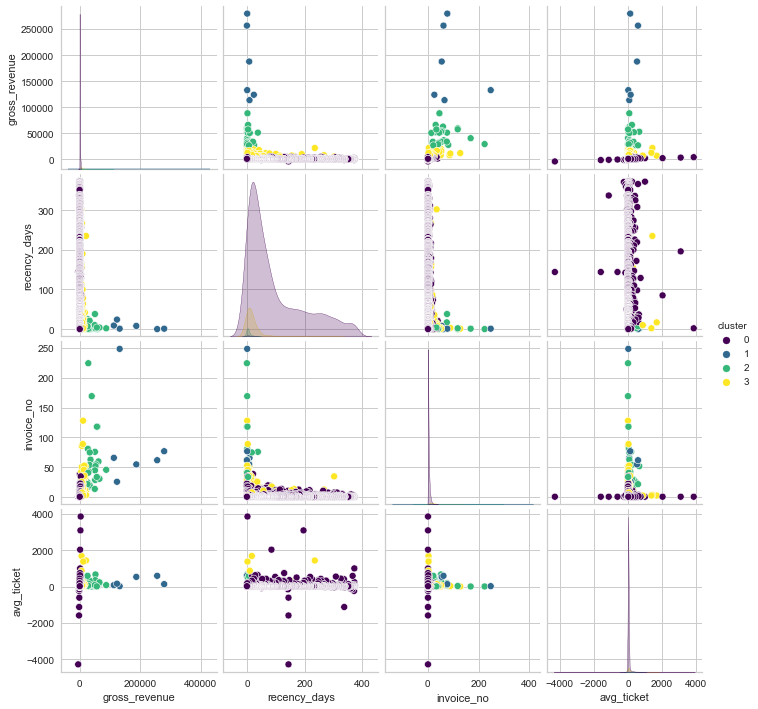

In [236]:
df_viz = df9.drop(columns='customer_id',axis=1)
sns.pairplot(df_viz, hue='cluster', palette='viridis');

### <font color = 'b'> 9.1.2 UMAP </f>

In [237]:
reducer = umap.UMAP( random_state=42,n_components=3)
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]
df_viz['embedding_z'] = embedding[:,2]

# plot UMAP
fig = plt.figure(figsize=(20,10))
px.scatter_3d(x='embedding_x',y='embedding_y',z='embedding_z',color='cluster',data_frame=df_viz).show()

<Figure size 1440x720 with 0 Axes>

## <font color = 'b'> 9.2. Cluster Profile </f>

In [238]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,3
1,13047,3079.10,31,18,15.709694,0
2,12583,7187.34,2,18,28.634821,3
3,13748,948.25,95,5,33.866071,0
4,15100,635.10,330,6,105.850000,0


In [239]:
# Number of customer
df_cluster = df9[['customer_id','cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id'] / df_cluster['customer_id'].sum())

# Averege Gross Revenue
df_avg_gross_revenue = df9[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_avg_gross_revenue['perc_gross'] = 100*(df_avg_gross_revenue['gross_revenue']/df_avg_gross_revenue['gross_revenue'].sum())
df_cluster = pd.merge(df_cluster,df_avg_gross_revenue,how='left',on='cluster')

# Average Recency Days
df_avg_recency_days = df9[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_recency_days,how='left',on='cluster')

# Averege Invoices
df_avg_invoices = df9[['invoice_no','cluster']].groupby('cluster').mean().reset_index()
df_avg_invoices['perc_invoices'] = 100*(df_avg_invoices['invoice_no']/df_avg_invoices['invoice_no'].sum())
df_cluster = pd.merge(df_cluster,df_avg_invoices,how='left',on='cluster')

# Averege Invoices
df_avg_ticket = df9[['avg_ticket','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_ticket,how='left',on='cluster')

In [240]:
df_cluster

,cluster,customer_id,perc_customer,gross_revenue,perc_gross,recency_days,invoice_no,perc_invoices,avg_ticket
0,0,4071,93.115279,946.696250,0.404862,96.969295,3.641120,2.141953,25.359654
1,1,6,0.137237,182181.981667,77.911453,7.166667,89.000000,52.355824,253.626345
2,2,28,0.640439,42614.387143,18.224353,6.178571,57.821429,34.014478,162.862605
3,3,267,6.107045,8089.028652,3.459332,20.280899,19.528090,11.487744,62.783157


### Cluster 01: Candidato à Insider 
    - Número de Customers: 6 (0.14% da base)
    - Recência média: 7 dias
    - Compras em média: 89 compras
    - Receita em média: R$ 182.182,00 dolares
    
    
### Cluster 02:
    - Número de Customers: 31 (0.71% da base)
    - Recência média: 13 dias
    - Compras em média: 18 compras
    - Receita em média: R$ 40.543,00 dolares
    
### Cluster 00: 
    - Número de Customers: 4335 (99.15% da base)
    - Recência média: 92 dias
    - Compras em média: 5 compras
    - Receita em média: R$ 1.372,00 dolares

# <font color = 'green'> 10.0. Deploy to Production </f>

# <font color = 'green'> 11.0. Sand Box </f>

## <font color = 'b'> 11.1. Original Dataset </f>

In [54]:
from sklearn import cluster as c

from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from matplotlib import pyplot as plt

C:\Users\Notebook\anaconda3\envs\insiders-clustering-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


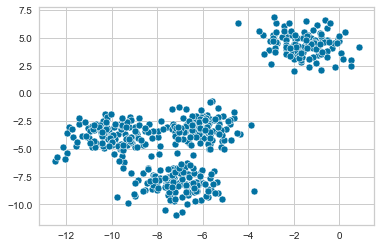

In [55]:
X, y= make_blobs(n_samples=500,
                 centers = 4,
                 cluster_std=1,
                 center_box = [-10,10],
                 shuffle=True,
                 random_state=1)

sns.scatterplot(X[:,0],X[:,1]);

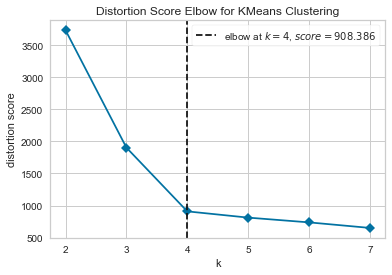

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, timings = False)
kmeans.fit( X )
kmeans.show()

## <font color = 'b'> 11.2. Silhoutte Analysis </f>

IndexError: index 2 is out of bounds for axis 0 with size 2

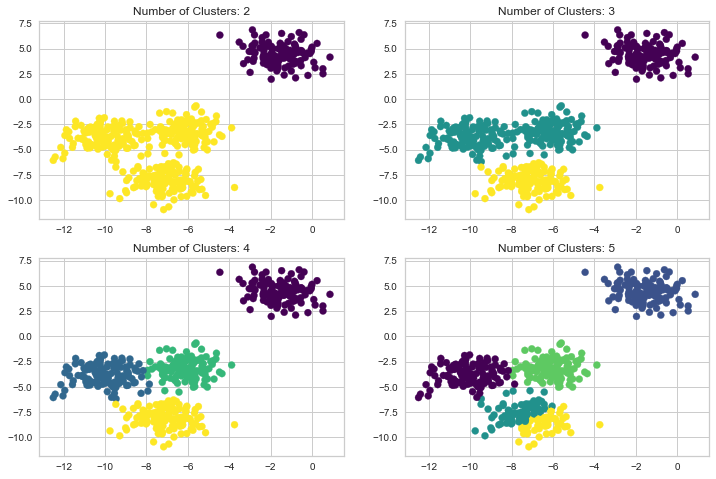

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
for i in clusters:
    kmeans = c.KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=300, random_state=42)
    kmeans.fit(X)
    
    q, mod = divmod(i,2)
    ax[q-1,mod].scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='viridis')
    ax[q-1,mod].set_title('Number of Clusters: {}'.format(i))

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
for i in clusters:
    kmeans = c.KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=300, random_state=42)
    
    q, mod = divmod(i,2)
    
    visualizer = SilhouetteVisualizer(kmeans,colors='yellowbrick',ax=ax[q-1,mod])
    visualizer.fit(X)
    visualizer.finalize()
    plt.tight_layout()